# Unstable iterations

Consider the iterations 
$$
x_0 = 1, \qquad x_1 = \frac{1}{3}, \qquad x_i = \frac{13}{3}x_{i-1} - \frac{4}{3} x_{i-2}, \qquad i=2,3,\ldots
$$
The exact solution is
$$
x_i = \frac{1}{3^i}
$$

In [15]:
%config InlineBackend.figure_format = 'svg'
from numpy import zeros, float32, float64, abs
import matplotlib.pyplot as plt

We first try with single precision. By default, Numpy uses double precision, so to use single precision, we have to explicitly specify this in Numpy functions.

     2     1.1111115664e-01     1.1111111194e-01
     3     3.7037219852e-02     3.7037037313e-02
     4     1.2346410193e-02     1.2345679104e-02
     5     4.1181510314e-03     4.1152262129e-03
     6     1.3834409183e-03     1.3717421098e-03
     7     5.0404260401e-04     4.5724736992e-04
     8     3.3959673601e-04     1.5241578512e-04
     9     7.9952902161e-04     5.0805261708e-05
    10     3.0118301511e-03     1.6935087842e-05
    11     1.1985225603e-02     5.6450294323e-06
    12     4.7920204699e-02     1.8816764396e-06
    13     1.9167391956e-01     6.2722546090e-07
    14     7.6669335365e-01     2.0907515363e-07
    15     3.0667726994e+00     6.9691715510e-08
    16     1.2267090797e+01     2.3230571244e-08
    17     4.9068363190e+01     7.7435240442e-09
    18     1.9627345276e+02     2.5811746074e-09
    19     7.8509381104e+02     8.6039153580e-10


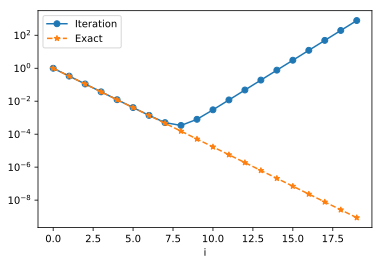

In [16]:
n = 20
x = zeros(n, dtype=float32)
y = zeros(n, dtype=float32)
x[0], y[0] = 1.0, 1.0
x[1], y[1] = 1.0/3.0, 1.0/3.0

for i in range(2,n):
    x[i] = (13.0/3.0)*x[i-1] - (4.0/3.0)*x[i-2]
    y[i] = y[i-1]/3.0
    print("%6d %20.10e %20.10e" % (i, x[i], y[i]))

plt.semilogy(range(n),x,'o-',range(n),y,'*--')
plt.legend(('Iteration','Exact'))
plt.xlabel('i');

The iterations start to blow up around iteration 9. Now we try with double precision.

     2     1.1111111111e-01     1.1111111111e-01
     3     3.7037037037e-02     3.7037037037e-02
     4     1.2345679012e-02     1.2345679012e-02
     5     4.1152263374e-03     4.1152263374e-03
     6     1.3717421124e-03     1.3717421125e-03
     7     4.5724737062e-04     4.5724737083e-04
     8     1.5241578946e-04     1.5241579028e-04
     9     5.0805260180e-05     5.0805263425e-05
    10     1.6935074827e-05     1.6935087808e-05
    11     5.6449773443e-06     5.6450292695e-06
    12     1.8814687225e-06     1.8816764232e-06
    13     6.2639467164e-07     6.2722547439e-07
    14     2.0575194713e-07     2.0907515813e-07
    15     5.6398875392e-08     6.9691719376e-08
    16    -2.9940802813e-08     2.3230573125e-08
    17    -2.0494197938e-07     7.7435243751e-09
    18    -8.4816084023e-07     2.5811747917e-09
    19    -3.4021076685e-06     8.6039159724e-10
    20    -1.3611585443e-05     2.8679719908e-10
    21    -5.4447393362e-05     9.5599066360e-11
    22    -2.1778992

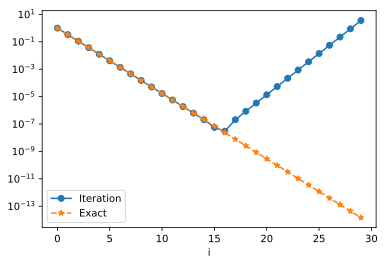

In [17]:
n = 30
x = zeros(n, dtype=float64)
y = zeros(n, dtype=float64)
x[0], y[0] = 1.0, 1.0
x[1], y[1] = 1.0/3.0, 1.0/3.0

for i in range(2,n):
    x[i] = (13.0/3.0)*x[i-1] - (4.0/3.0)*x[i-2]
    y[i] = y[i-1]/3.0
    print("%6d %20.10e %20.10e" % (i, x[i], y[i]))
    
plt.semilogy(range(n),abs(x),'o-',range(n),y,'*--')
plt.legend(('Iteration','Exact'))
plt.xlabel('i');

The iterations are stable for more steps but they eventually start to blow up.